In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import math
import syllabenn_ranna_kw as syl
import codecs
from collections import defaultdict

In [3]:
# run the syllable segmentation program on the Skeul an Yeth example sentences
# as the default, it will use reverse segmentation starting from the end of each word
infilename = "kernewek_corpus/kemmyn_prefstrip/skeulanyeth1_kw_kk.txt"
infile = codecs.open(infilename, "r", encoding="utf-8", errors="replace")
inputtext = infile.read()
inputtext = syl.preprocess2ASCII(inputtext)
regexps = syl.kwKemmynRegExp
rannans = syl.RannaSyllabenn(inputtext)
counts = syl.CountAllSyls()
for i in rannans.geryow:
    g = syl.Ger(i,rannans, counts, fwds=False, regexps=regexps,
                    FSSmode=False,
                    CYmode=False, gwarnya=False)
#print(syl.totalcountsOutput(counts))

In [4]:
# running the above program will mean a variable counts is created which is a CountAllSyls object
# which contains a number of variables such as counts.NSylTotal
print("Total number of syllables in text = {NSyl}".format(NSyl=counts.NSylTotal))

Total number of syllables in text = 14419


In [5]:
# get the dictionary of syllables and their frequencies out of the CountAllSyls object
# and use the function to remove any punctuation characters
AllSyllablesDict_nopunct = counts.remove_punctchars(counts.AllSyllablesDict)

In [6]:
#make it into a list of tuples
AllSyllablesDictkv = [(k,v) for (k,v) in AllSyllablesDict_nopunct.items()]

In [7]:
# sort the syllables alphabetically
counts.AllSyllablesAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0], reverse=False)

In [8]:
print("All syllables found in text, with frequencies")
print(counts.AllSyllablesAlphaSort)

All syllables found in text, with frequencies
[('a', 561), ('agh', 1), ('al', 11), ('am', 2), ('an', 805), ('ann', 1), ('ans', 4), ('ap', 1), ('ar', 32), ('argh', 3), ('arm', 1), ('as', 3), ('ass', 9), ('ay', 3), ('ba', 16), ('bal', 4), ('bals', 3), ('ban', 4), ('bar', 6), ('barth', 19), ('bas', 1), ('bav', 40), ('be', 19), ('bedh', 1), ('bel', 1), ('bell', 9), ('benn', 1), ('ber', 8), ('berr', 8), ('bes', 19), ('bi', 3), ('bis', 2), ('bla', 2), ('blat', 1), ('bleu', 5), ('bleuj', 1), ('bloedh', 6), ('blos', 2), ('blu', 8), ('bly', 1), ('bo', 25), ('boe', 7), ('boen', 2), ('boes', 19), ('boeth', 2), ('bon', 1), ('bord', 1), ('bos', 10), ('bour', 8), ('bours', 1), ('bov', 2), ('bow', 1), ('bown', 1), ('bra', 2), ('braf', 1), ('bras', 19), ('brav', 11), ('bre', 18), ('bregh', 2), ('brek', 6), ('bren', 5), ('brenn', 6), ('bri', 19), ('bris', 2), ('bro', 10), ('broj', 1), ('bron', 1), ('bronn', 1), ('bry', 4), ('bryn', 7), ('brys', 2), ('bu', 2), ('bub', 1), ('by', 19), ('bydh', 1), ('byl'

In [9]:
print("Total number of different syllables = {t}".format(t=len(counts.AllSyllablesAlphaSort)))

Total number of different syllables = 1056


In [10]:
# punctuation characters are now removed

In [11]:
len([t for t in counts.AllSyllablesAlphaSort if "'" in t[0]])

0

In [12]:
len([t for t in counts.AllSyllablesAlphaSort if "-" in t[0]])

0

In [13]:
len([t for t in counts.AllSyllablesAlphaSort if '"' in t[0]])

0

In [14]:
# count up how many syllables start with each letter of the alphabet

In [15]:
# q, x not used in Kernewek Kemmyn
# z only for a few loan words, and c only in digraph ch but haven't made assumption here

In [16]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"

In [17]:
sylls_letter = defaultdict(list)
totalsyls_letter = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables starting with the letter
        sylls_letter[i].append(t)
    # list the syllables starting with the letter
    print("Syllables starting with {L}".format(L=i))
    print(sylls_letter[i])
    # fill the totalsyls_letter dictionary
    # with the sum of the frequencies of all syllables
    # starting with each letter
    total_starting_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_starting_letter))
    totalsyls_letter[i] = total_starting_letter

Syllables starting with a
[('a', 561), ('agh', 1), ('al', 11), ('am', 2), ('an', 805), ('ann', 1), ('ans', 4), ('ap', 1), ('ar', 32), ('argh', 3), ('arm', 1), ('as', 3), ('ass', 9), ('ay', 3)]
total number = 1437
Syllables starting with b
[('ba', 16), ('bal', 4), ('bals', 3), ('ban', 4), ('bar', 6), ('barth', 19), ('bas', 1), ('bav', 40), ('be', 19), ('bedh', 1), ('bel', 1), ('bell', 9), ('benn', 1), ('ber', 8), ('berr', 8), ('bes', 19), ('bi', 3), ('bis', 2), ('bla', 2), ('blat', 1), ('bleu', 5), ('bleuj', 1), ('bloedh', 6), ('blos', 2), ('blu', 8), ('bly', 1), ('bo', 25), ('boe', 7), ('boen', 2), ('boes', 19), ('boeth', 2), ('bon', 1), ('bord', 1), ('bos', 10), ('bour', 8), ('bours', 1), ('bov', 2), ('bow', 1), ('bown', 1), ('bra', 2), ('braf', 1), ('bras', 19), ('brav', 11), ('bre', 18), ('bregh', 2), ('brek', 6), ('bren', 5), ('brenn', 6), ('bri', 19), ('bris', 2), ('bro', 10), ('broj', 1), ('bron', 1), ('bronn', 1), ('bry', 4), ('bryn', 7), ('brys', 2), ('bu', 2), ('bub', 1), ('by

In [18]:
print("Total syllables starting with each letter of the alphabet:\n{T}".format(T=totalsyls_letter))

Total syllables starting with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 1437, 'b': 427, 'c': 69, 'd': 1187, 'e': 641, 'f': 214, 'g': 950, 'h': 716, 'i': 61, 'j': 106, 'k': 477, 'l': 553, 'm': 943, 'n': 1037, 'o': 445, 'p': 601, 'q': 0, 'r': 506, 's': 800, 't': 595, 'u': 110, 'v': 535, 'w': 548, 'x': 0, 'y': 1461, 'z': 0})


In [19]:
# repeat the process for two letter combinations starting the syllable
sylls_2letter = defaultdict(list)
totalsyls_2letter = defaultdict(int)
# this time, assume no q, x, z
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [20]:
# use a nested loop for the two letter combinations
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .startswith rather than == to avoid error with single character syllables
        letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][0:2].startswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv:
            sylls_2letter[twoletters].append(t)
        if len(letter_dictkv) > 0:
            print("Syllables starting with {L}".format(L=twoletters))
            print(sylls_2letter[twoletters])
            total_starting_2letter = sum(t[1] for t in letter_dictkv)
            totalsyls_2letter[twoletters] = total_starting_2letter

Syllables starting with ag
[('agh', 1)]
Syllables starting with al
[('al', 11)]
Syllables starting with am
[('am', 2)]
Syllables starting with an
[('an', 805), ('ann', 1), ('ans', 4)]
Syllables starting with ap
[('ap', 1)]
Syllables starting with ar
[('ar', 32), ('argh', 3), ('arm', 1)]
Syllables starting with as
[('as', 3), ('ass', 9)]
Syllables starting with ay
[('ay', 3)]
Syllables starting with ba
[('ba', 16), ('bal', 4), ('bals', 3), ('ban', 4), ('bar', 6), ('barth', 19), ('bas', 1), ('bav', 40)]
Syllables starting with be
[('be', 19), ('bedh', 1), ('bel', 1), ('bell', 9), ('benn', 1), ('ber', 8), ('berr', 8), ('bes', 19)]
Syllables starting with bi
[('bi', 3), ('bis', 2)]
Syllables starting with bl
[('bla', 2), ('blat', 1), ('bleu', 5), ('bleuj', 1), ('bloedh', 6), ('blos', 2), ('blu', 8), ('bly', 1)]
Syllables starting with bo
[('bo', 25), ('boe', 7), ('boen', 2), ('boes', 19), ('boeth', 2), ('bon', 1), ('bord', 1), ('bos', 10), ('bour', 8), ('bours', 1), ('bov', 2), ('bow', 1),

In [21]:
print("Total syllables starting with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter))
print("Total number of different 2 letter combinations that start syllables = {N2}".format(N2=len(totalsyls_2letter)))

Total syllables starting with each two letters of the alphabet:
defaultdict(<class 'int'>, {'ag': 1, 'al': 11, 'am': 2, 'an': 810, 'ap': 1, 'ar': 36, 'as': 12, 'ay': 3, 'ba': 93, 'be': 66, 'bi': 5, 'bl': 26, 'bo': 80, 'br': 117, 'bu': 3, 'by': 37, 'ce': 1, 'ch': 67, 'co': 1, 'da': 119, 'de': 233, 'dh': 467, 'di': 50, 'do': 78, 'dr': 140, 'du': 13, 'dy': 87, 'ek': 6, 'en': 18, 'er': 14, 'es': 21, 'et': 22, 'eu': 182, 'ev': 77, 'ew': 7, 'ey': 15, 'fa': 61, 'fe': 38, 'fi': 8, 'fl': 43, 'fo': 41, 'fr': 14, 'fu': 8, 'fy': 1, 'ga': 179, 'ge': 255, 'gh': 101, 'gi': 28, 'gl': 70, 'go': 128, 'gr': 16, 'gu': 6, 'gw': 149, 'gy': 18, 'ha': 201, 'he': 185, 'hi': 118, 'ho': 45, 'hu': 11, 'hw': 120, 'hy': 36, 'ja': 6, 'je': 12, 'ji': 34, 'jo': 13, 'jy': 41, 'ka': 103, 'ke': 169, 'ki': 26, 'kl': 13, 'ko': 86, 'kr': 27, 'ku': 16, 'kw': 9, 'ky': 28, 'la': 43, 'le': 206, 'li': 40, 'll': 61, 'lo': 131, 'lu': 5, 'ly': 67, 'ma': 563, 'me': 156, 'mi': 28, 'mo': 70, 'my': 126, 'na': 396, 'ne': 213, 'ni': 56, 

In [22]:
# convert the defaultdict into a list of tuples
syls_2letter = [t for t in totalsyls_2letter]

In [23]:
# list of integers of the frequencies
syls_2letterN = [totalsyls_2letter[t] for t in totalsyls_2letter]
print(syls_2letterN)

[1, 11, 2, 810, 1, 36, 12, 3, 93, 66, 5, 26, 80, 117, 3, 37, 1, 67, 1, 119, 233, 467, 50, 78, 140, 13, 87, 6, 18, 14, 21, 22, 182, 77, 7, 15, 61, 38, 8, 43, 41, 14, 8, 1, 179, 255, 101, 28, 70, 128, 16, 6, 149, 18, 201, 185, 118, 45, 11, 120, 36, 6, 12, 34, 13, 41, 103, 169, 26, 13, 86, 27, 16, 9, 28, 43, 206, 40, 61, 131, 5, 67, 563, 156, 28, 70, 126, 396, 213, 56, 120, 1, 251, 8, 4, 32, 22, 6, 38, 3, 36, 1, 12, 132, 4, 101, 77, 28, 113, 62, 60, 49, 111, 136, 168, 79, 59, 16, 48, 116, 142, 7, 88, 91, 1, 3, 81, 8, 123, 38, 20, 82, 86, 170, 96, 42, 12, 69, 76, 5, 16, 23, 4, 18, 91, 226, 12, 6, 65, 42, 5, 88, 150, 188, 17, 8, 93, 46, 3, 43, 61, 5, 18, 328, 61, 48, 2, 636]


Text(0.5, 1.0, 'Counts of initial two letters of all syllables in Skeul an Yeth 1 sentences')

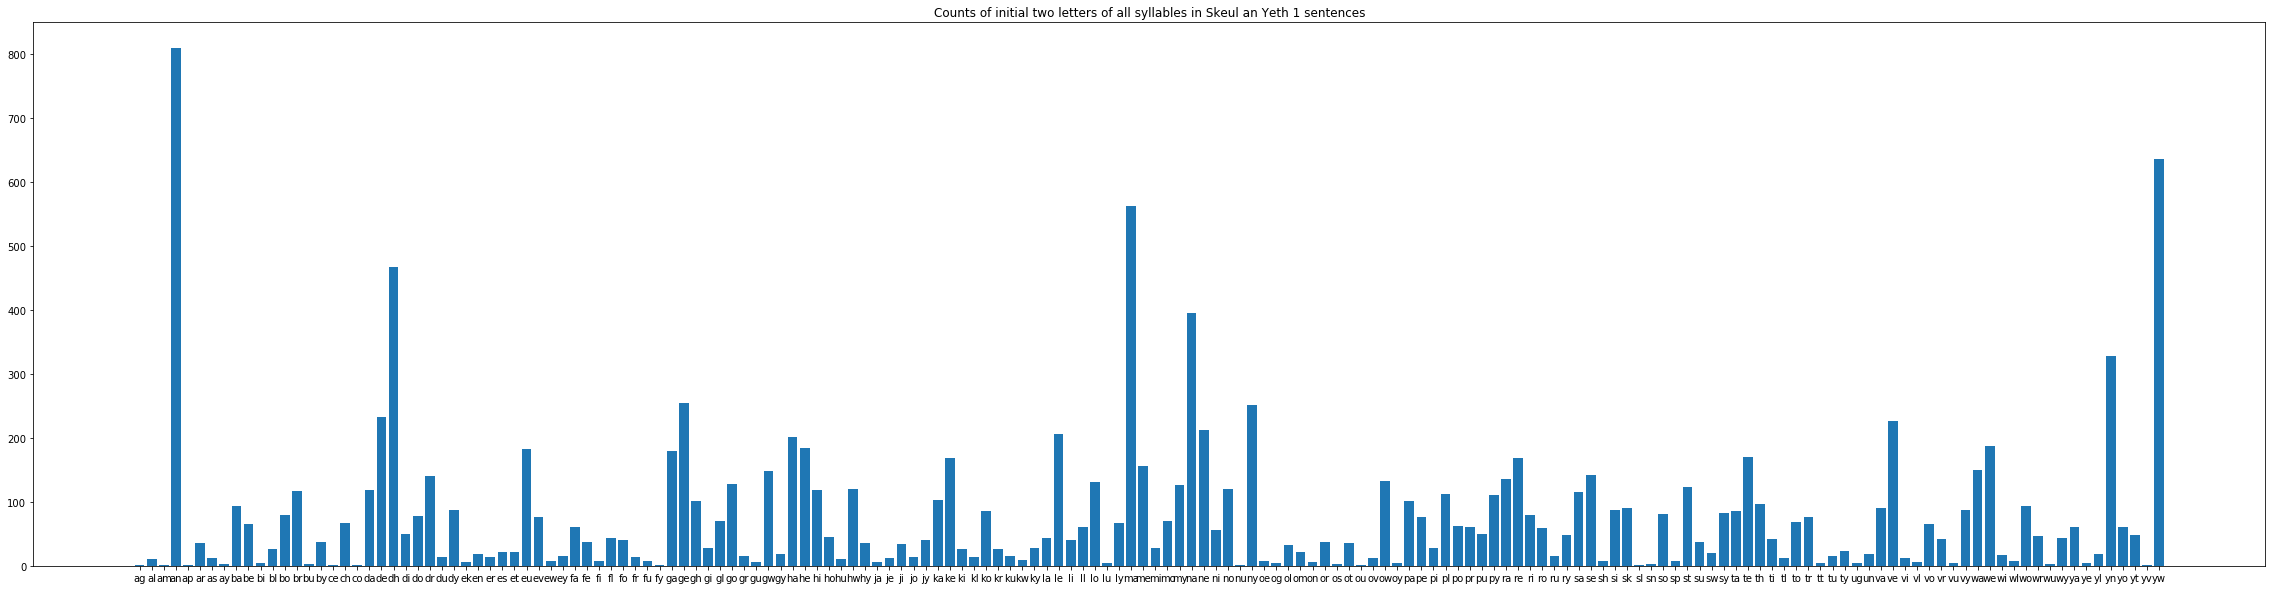

In [24]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter))
p1 = ax.bar(ind, syls_2letterN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter)
ax.set_title('Counts of initial two letters of all syllables in Skeul an Yeth 1 sentences')

In [25]:
# create a 2D histogram of the frequencies
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter[twoletters])

In [26]:
#print(hist2d)

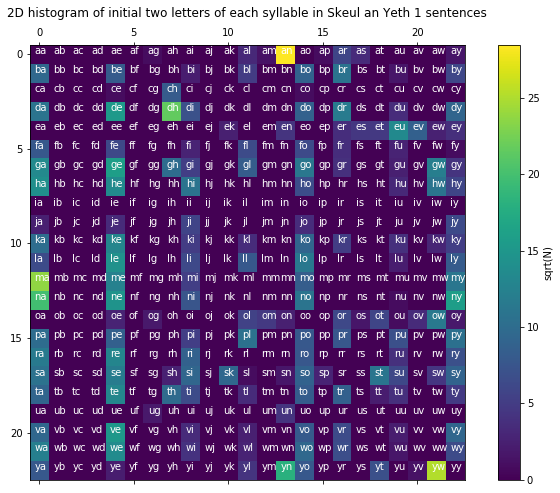

In [27]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
ax.set_title("2D histogram of initial two letters of each syllable in Skeul an Yeth 1 sentences")
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")

In [28]:
# sort by the end letter of the syllable
counts.AllSyllablesRevAlphaSort = sorted(AllSyllablesDictkv, key=lambda AllSyllablesDictkv:
                                     AllSyllablesDictkv[0][-1], reverse=False)

In [29]:
print("All syllables found in text, with frequencies, sorted by final letter")
print(counts.AllSyllablesRevAlphaSort)

All syllables found in text, with frequencies, sorted by final letter
[('da', 97), ('fa', 49), ('tla', 12), ('ha', 132), ('ma', 434), ('a', 561), ('ja', 5), ('dha', 78), ('lla', 24), ('na', 265), ('ka', 38), ('va', 26), ('ga', 62), ('tra', 20), ('dra', 20), ('pa', 43), ('sa', 100), ('ta', 57), ('sta', 17), ('wra', 17), ('ska', 14), ('gra', 2), ('bra', 2), ('ba', 16), ('ra', 32), ('thra', 1), ('tha', 5), ('cha', 4), ('pla', 2), ('la', 21), ('gwra', 3), ('bla', 2), ('ttha', 5), ('gla', 2), ('ya', 29), ('gha', 1), ('kwa', 3), ('swa', 3), ('gwa', 11), ('wa', 5), ('vra', 1), ('hwa', 1), ('hwra', 1), ('ryb', 17), ('mab', 4), ('glyb', 1), ('pub', 8), ('heb', 7), ('peub', 2), ('lyb', 2), ('bub', 1), ('veb', 2), ('meb', 1), ('dyb', 1), ('kard', 1), ('red', 14), ('rad', 1), ('chard', 1), ('bord', 1), ('ge', 149), ('re', 90), ('ve', 44), ('ne', 92), ('we', 57), ('ste', 22), ('te', 42), ('e', 279), ('le', 49), ('dre', 65), ('he', 51), ('me', 32), ('gwe', 42), ('de', 32), ('bre', 18), ('dhe', 101),

In [30]:
alpha_lowercase = "abcdefghijklmnopqrstuvwxyz"
sylls_letter_end = defaultdict(list)
totalsyls_letter_end = defaultdict(int)
for i in alpha_lowercase:
    # for each letter, create a list of tuples of syllables and frequencies
    letter_dictkv = [t for t in counts.AllSyllablesAlphaSort if t[0][-1].lower()==i]
    #print(letter_dictkv)
    for t in letter_dictkv:
        # append to the list of all syllables ending with the letter
        sylls_letter_end[i].append(t)
    # list the syllables ending with the letter
    print("Syllables ending with {L}".format(L=i))
    print(sylls_letter_end[i])
    # fill the totalsyls_letter_end dictionary
    # with the sum of the frequencies of all syllables
    # ending with each letter
    total_ending_letter = sum(t[1] for t in letter_dictkv)
    print("total number = {q}".format(q=total_ending_letter))
    totalsyls_letter_end[i] = total_ending_letter

Syllables ending with a
[('a', 561), ('ba', 16), ('bla', 2), ('bra', 2), ('cha', 4), ('da', 97), ('dha', 78), ('dra', 20), ('fa', 49), ('ga', 62), ('gha', 1), ('gla', 2), ('gra', 2), ('gwa', 11), ('gwra', 3), ('ha', 132), ('hwa', 1), ('hwra', 1), ('ja', 5), ('ka', 38), ('kwa', 3), ('la', 21), ('lla', 24), ('ma', 434), ('na', 265), ('pa', 43), ('pla', 2), ('ra', 32), ('sa', 100), ('ska', 14), ('sta', 17), ('swa', 3), ('ta', 57), ('tha', 5), ('thra', 1), ('tla', 12), ('tra', 20), ('ttha', 5), ('va', 26), ('vra', 1), ('wa', 5), ('wra', 17), ('ya', 29)]
total number = 2223
Syllables ending with b
[('bub', 1), ('dyb', 1), ('glyb', 1), ('heb', 7), ('lyb', 2), ('mab', 4), ('meb', 1), ('peub', 2), ('pub', 8), ('ryb', 17), ('veb', 2)]
total number = 46
Syllables ending with c
[]
total number = 0
Syllables ending with d
[('bord', 1), ('chard', 1), ('kard', 1), ('rad', 1), ('red', 14)]
total number = 18
Syllables ending with e
[('be', 19), ('boe', 7), ('bre', 18), ('ce', 1), ('che', 2), ('de', 32

In [31]:
print("Total syllables ending with each letter of the alphabet:\n{T}".format(T=totalsyls_letter_end))

Total syllables ending with each letter of the alphabet:
defaultdict(<class 'int'>, {'a': 2223, 'b': 46, 'c': 0, 'd': 18, 'e': 1440, 'f': 12, 'g': 237, 'h': 633, 'i': 716, 'j': 3, 'k': 175, 'l': 559, 'm': 313, 'n': 2266, 'o': 545, 'p': 42, 'q': 0, 'r': 1154, 's': 1610, 't': 94, 'u': 199, 'v': 262, 'w': 1081, 'x': 0, 'y': 791, 'z': 0})


In [32]:
# count up how many syllables end with each letter of the alphabet
sylls_2letter_end = defaultdict(list)
totalsyls_2letter_end = defaultdict(int)
alpha_lowercase = "abcdefghijklmnoprstuvwy"

In [33]:
for i in alpha_lowercase:
    for j in alpha_lowercase:
        twoletters = i+j
        #print(twoletters)
        # use .endswith rather than == to avoid error with single character syllables
        letter_dictkv_end = [t for t in counts.AllSyllablesRevAlphaSort if t[0][-2:].endswith(twoletters)]
        #print(letter_dictkv)
        for t in letter_dictkv_end:
            sylls_2letter_end[twoletters].append(t)
        if len(letter_dictkv_end) > 0:
            print("Syllables ending with {L}".format(L=twoletters))
            print(sylls_2letter_end[twoletters])
            total_ending_2letter = sum(t[1] for t in letter_dictkv_end)
            totalsyls_2letter_end[twoletters] = total_ending_2letter

Syllables ending with ab
[('mab', 4)]
Syllables ending with ad
[('rad', 1)]
Syllables ending with af
[('daf', 1), ('naf', 1), ('dhaf', 1), ('braf', 1)]
Syllables ending with ag
[('nag', 38), ('rag', 27), ('hag', 19), ('gwag', 7), ('vag', 1), ('prag', 13)]
Syllables ending with ak
[('tak', 1)]
Syllables ending with al
[('mal', 1), ('val', 17), ('al', 11), ('tal', 1), ('ghal', 4), ('bal', 4), ('dal', 2), ('gal', 2), ('hal', 2), ('pal', 1)]
Syllables ending with am
[('pam', 7), ('cham', 8), ('tam', 6), ('sam', 2), ('mam', 1), ('jam', 1), ('stam', 1), ('lam', 1), ('am', 2), ('ham', 1)]
Syllables ending with an
[('fan', 5), ('an', 805), ('nan', 37), ('han', 35), ('ban', 4), ('ghan', 21), ('van', 8), ('ran', 11), ('man', 3), ('kan', 4), ('gan', 40), ('tan', 7), ('dan', 6), ('llan', 1), ('pan', 16), ('lan', 6), ('glan', 1)]
Syllables ending with ap
[('map', 1), ('ap', 1)]
Syllables ending with ar
[('char', 2), ('mar', 84), ('war', 88), ('ar', 32), ('par', 18), ('har', 3), ('gar', 6), ('swar',

In [34]:
print("Total syllables ending with each two letters of the alphabet:\n{T}".format(T=totalsyls_2letter_end))
print("Total number of different 2 letter combinations that end syllables = {N2}".format(N2=len(totalsyls_2letter_end)))

Total syllables ending with each two letters of the alphabet:
defaultdict(<class 'int'>, {'ab': 4, 'ad': 1, 'af': 4, 'ag': 105, 'ak': 1, 'al': 45, 'am': 30, 'an': 1010, 'ap': 2, 'ar': 272, 'as': 252, 'at': 9, 'av': 103, 'aw': 35, 'ay': 13, 'ba': 16, 'be': 19, 'bi': 3, 'bo': 25, 'bu': 2, 'by': 19, 'ce': 1, 'da': 97, 'de': 32, 'dh': 152, 'di': 41, 'do': 12, 'dr': 11, 'du': 4, 'dy': 62, 'eb': 10, 'ed': 14, 'ef': 3, 'eg': 95, 'ek': 121, 'el': 167, 'em': 126, 'en': 292, 'ep': 13, 'er': 348, 'es': 424, 'et': 8, 'eu': 25, 'ev': 114, 'ew': 42, 'ey': 15, 'fa': 49, 'fe': 8, 'fi': 8, 'fo': 10, 'ga': 62, 'ge': 149, 'gh': 142, 'gi': 8, 'go': 18, 'gy': 4, 'ha': 225, 'he': 163, 'hi': 170, 'ho': 58, 'hu': 23, 'hy': 42, 'ig': 3, 'ij': 1, 'ik': 17, 'il': 13, 'im': 1, 'in': 79, 'ir': 48, 'is': 57, 'iv': 1, 'iw': 42, 'ja': 5, 'je': 3, 'ji': 34, 'jo': 11, 'jy': 15, 'ka': 52, 'ke': 25, 'ki': 28, 'kk': 1, 'ko': 23, 'ku': 3, 'la': 63, 'le': 111, 'lf': 1, 'li': 38, 'll': 257, 'lm': 2, 'lo': 63, 'ls': 7, 'lt': 

In [35]:
# convert the defaultdict into a list of tuples
syls_2letter_end = [t for t in totalsyls_2letter_end]
# list of integers of the frequencies
syls_2letter_endN = [totalsyls_2letter_end[t] for t in totalsyls_2letter_end]
print(syls_2letter_endN)

[4, 1, 4, 105, 1, 45, 30, 1010, 2, 272, 252, 9, 103, 35, 13, 16, 19, 3, 25, 2, 19, 1, 97, 32, 152, 41, 12, 11, 4, 62, 10, 14, 3, 95, 121, 167, 126, 292, 13, 348, 424, 8, 25, 114, 42, 15, 49, 8, 8, 10, 62, 149, 142, 8, 18, 4, 225, 163, 170, 58, 23, 42, 3, 1, 17, 13, 1, 79, 48, 57, 1, 42, 5, 3, 34, 11, 15, 52, 25, 28, 1, 23, 3, 63, 111, 1, 38, 257, 2, 63, 7, 1, 29, 59, 434, 32, 7, 89, 15, 13, 40, 265, 92, 53, 9, 254, 35, 434, 14, 74, 14, 4, 16, 1, 8, 37, 53, 89, 4, 129, 107, 37, 3, 27, 311, 17, 43, 26, 1, 19, 2, 6, 58, 99, 3, 209, 128, 2, 4, 1, 41, 33, 69, 2, 1, 12, 11, 100, 31, 60, 11, 14, 11, 10, 1, 3, 74, 64, 339, 35, 12, 2, 2, 19, 11, 15, 1, 15, 22, 4, 217, 162, 9, 4, 26, 44, 3, 11, 1, 29, 23, 138, 38, 8, 13, 29, 47, 12, 9, 29, 21, 3, 5, 13, 11, 466, 10, 4, 13, 142, 12, 8, 647]


Text(0.5, 1.0, 'Counts of final two letters of all syllables in Skeul an Yeth 1 sentences')

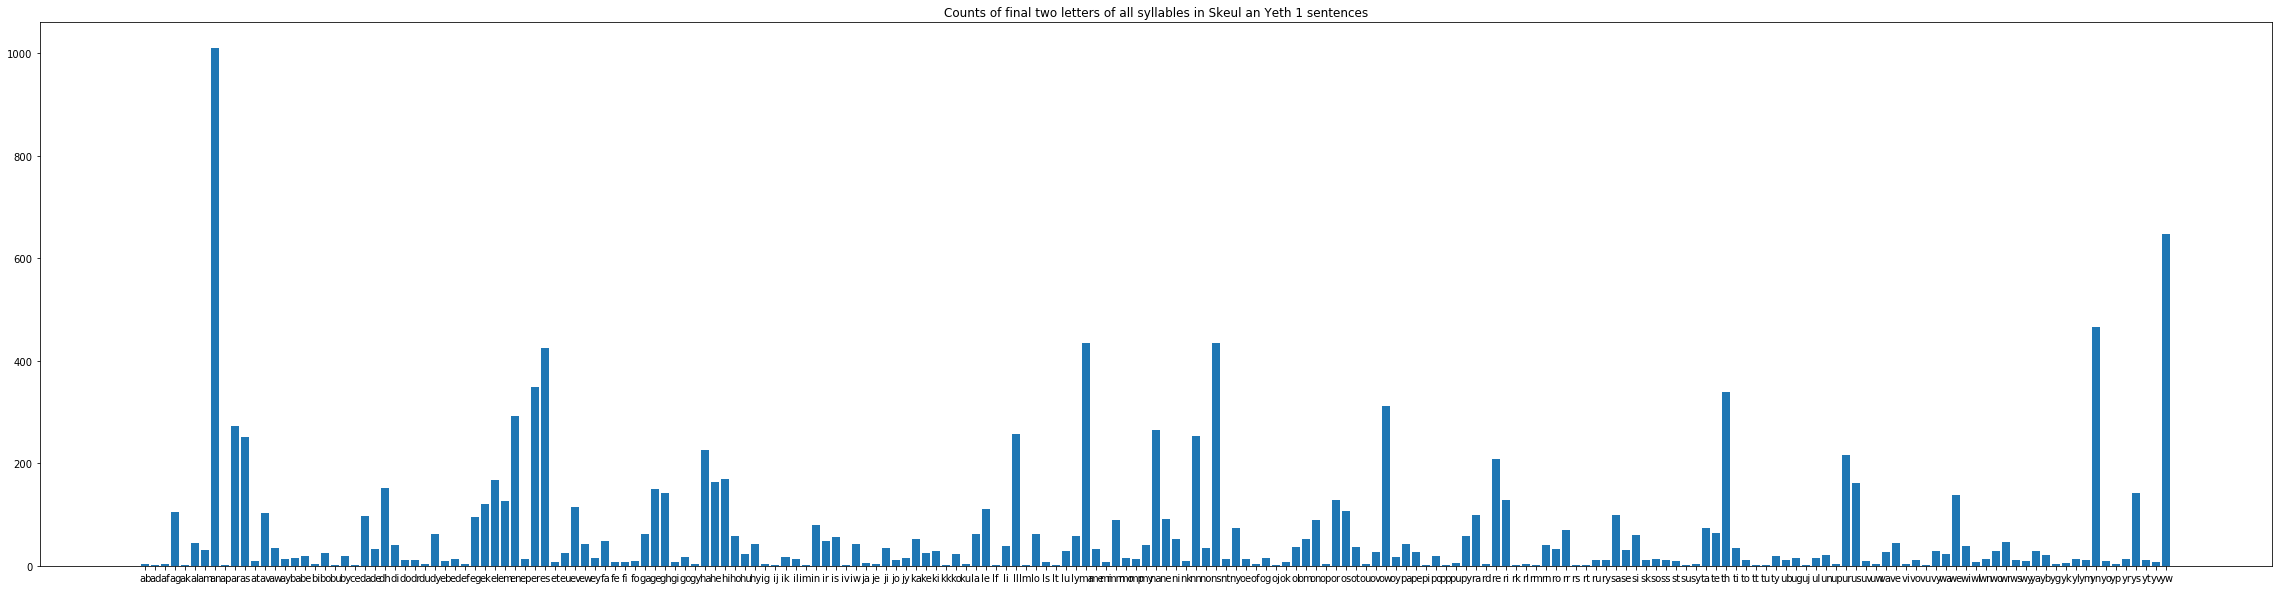

In [36]:
# create a matplotlib figure
fig = plt.figure(figsize=[40,10])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(totalsyls_2letter_end))
p1 = ax.bar(ind, syls_2letter_endN)
ax.set_xticks(ind)
ax.set_xticklabels(syls_2letter_end)
ax.set_title('Counts of final two letters of all syllables in Skeul an Yeth 1 sentences')

In [37]:
hist2d = np.zeros([len(alpha_lowercase),len(alpha_lowercase)])
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = a+b
        hist2d[i][j] = math.sqrt(totalsyls_2letter_end[twoletters])

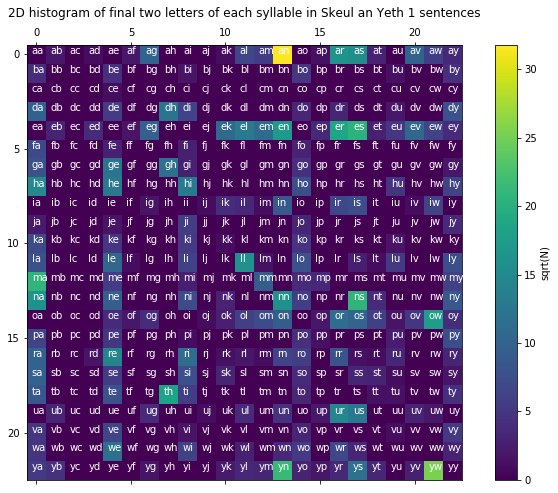

In [38]:
fig = plt.figure(figsize=[12,8])
ax = fig.add_subplot(1,1,1)
ind = np.arange(len(alpha_lowercase))
im = ax.matshow(hist2d)
ax.set_title("2D histogram of final two letters of each syllable in Skeul an Yeth 1 sentences")
cbar = plt.colorbar(im)
cbar.set_label("sqrt(N)")
for i, a in enumerate(alpha_lowercase):
    for j, b in enumerate(alpha_lowercase):
        twoletters = b+a
        ax.annotate(twoletters,[-0.25+i,j],color="w")